# Bar-in-Bar Chart

In [1]:
# import library
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# import data
data_proteins = {
    'animal': ['Mouse', 'Chicken', 'Goat', 'Canine', 'Guinea Pig'],
    'dep_total': [358, 257, 226, 220, 185],
    'dep1': [348, 245, 216, 212, 183],
    'dep2': [349, 242, 218, 207, 182],
    'dep3': [338, 247, 221, 209, 174],
    'undep_total': [251, 221, 153, 176, 152],
    'undep1': [236, 204, 142, 160, 141],
    'undep2': [238, 206, 141, 163, 145],
    'undep3': [233, 211, 148, 167, 144],
}

df_proteins = pd.DataFrame(data_proteins)


data_peptides = {
    'animal': ['Mouse', 'Chicken', 'Goat', 'Canine', 'Guinea Pig'],
    'dep_total': [3105, 2605, 1895, 2183, 2276],
    'dep1': [2830, 2365, 1727, 1998, 2069],
    'dep2': [2882, 2357, 1724, 2002, 2081],
    'dep3': [2852, 2377, 1720, 1995, 2060],
    'undep_total': [2159, 2139, 763, 1661, 1727],
    'undep1': [1960, 1932, 679, 1476, 1544],
    'undep2': [1940, 1934, 681, 1475, 1546],
    'undep3': [1923, 1918, 690, 1458, 1565]
}

df_peptides = pd.DataFrame(data_peptides)

In [81]:
def draw_bar_in_bar_chart(df, 
                              chart_name, 
                              inner_color_dep, 
                              inner_color_undep, 
                              outer_color_dep,
                              outer_color_undep):
    # Calculate means and standard deviations
    dep_means = df[['dep1', 'dep2', 'dep3']].mean(axis=1)
    undep_means = df[['undep1', 'undep2', 'undep3']].mean(axis=1)
    dep_std = df[['dep1', 'dep2', 'dep3']].std(axis=1)
    undep_std = df[['undep1', 'undep2', 'undep3']].std(axis=1)

    # Create a figure and axis
    fig, ax = plt.subplots()

    # Width of the outer and inner bars
    width_outer = 0.3
    width_inner = 0.1
    spacing = 0.1 # Additional spacing between bars

    # Set positions for the bars
    ind = np.arange(len(df['animal']))
    ind_inner = ind + spacing

    # Plot outer bars
    rects1 = ax.bar(ind - width_outer / 2, 
                    df['dep_total'], 
                    width_outer, 
                    label='Kit-Depleted Total', 
                    color=outer_color_dep, 
                    edgecolor='black', 
                    linewidth = 1)
    rects2 = ax.bar(ind + width_outer / 2 + spacing, 
                    df['undep_total'], 
                    width_outer, 
                    label='Undepleted Total', 
                    color=outer_color_undep, 
                    edgecolor='black', 
                    linewidth = 1)

    # Plot inner bars
    rects3 = ax.bar(ind - width_outer / 2, 
                    dep_means, 
                    width_inner, 
                    label='Kit-Depleted Individual', 
                    color=inner_color_dep, 
                    edgecolor='black', 
                    linewidth = 1)
    ax.errorbar(ind - width_outer / 2, 
                dep_means, 
                yerr=dep_std, 
                fmt='none', 
                color='black', 
                capsize=2, 
                elinewidth=1)
    rects4 = ax.bar(ind + width_outer / 2 + spacing, 
                    undep_means, 
                    width_inner,  
                    label='Undepleted Individual', 
                    color=inner_color_undep, #light blue
                    edgecolor='black', 
                    capsize=2, 
                    linewidth = 1)
    ax.errorbar(ind + width_outer / 2 + spacing, 
                undep_means, 
                yerr=undep_std, 
                fmt='none', 
                color='black', 
                capsize=2, 
                elinewidth=1)
    # Add labels, title and legend
    ax.set_ylabel('No. of '+ chart_name)
    ax.set_xticks(ind + spacing / 2)
    ax.set_xticklabels(df['animal'])
    ax.legend(frameon=False)
    plt.savefig(chart_name+'.svg', format = 'svg', dpi=300)
    plt.show()





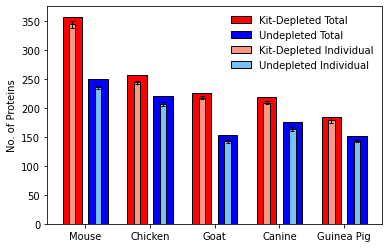

In [82]:
draw_bar_in_bar_chart(df_proteins, 
                          'Proteins', 
                          '#FA9884', 
                          '#75C2F6', 
                          'red', 
                          'blue')

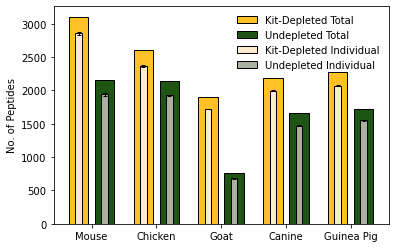

In [83]:
draw_bar_in_bar_chart(df_peptides, 
                          'Peptides', 
                          '#ffebcd', #light yellow
                          '#aab29f', #light green
                          '#ffc125', #yellow
                          '#1f5514') #green